In [1]:
# This part is to find the optimal choice of t_0. 

In [2]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import math
from math import e
import scipy.integrate as integrate
from scipy.stats import gamma
import matplotlib.pyplot as plt

In [12]:
def finite_sum(t,t_0):
    finite_sum = 0
    for i in range(3000):
        cdf = gamma.cdf(math.log(t/t_0), i+1, loc=0, scale=1/(i+1))
        finite_sum = finite_sum + cdf
    return finite_sum

In [13]:
def tails(t_0):
    a_0 = pow(e*math.log(1/t_0),3000)
    r = e*math.log(1/t_0)
    converge = a_0/(1-r)
    return converge

In [5]:
def selection_prob(t,t_0):
    prob = 1 - finite_sum(t,t_0) - tails(t_0)
    return prob

In [14]:
def ratio(t_0):
    integral = integrate.quad(lambda t: selection_prob(t,t_0), t_0, 1)
    ratio = integral[0]
    return ratio

In [7]:
thresholds = np.arange(0.70, 0.99, 0.01)
ratios = [ratio(t_0) for t_0 in thresholds]

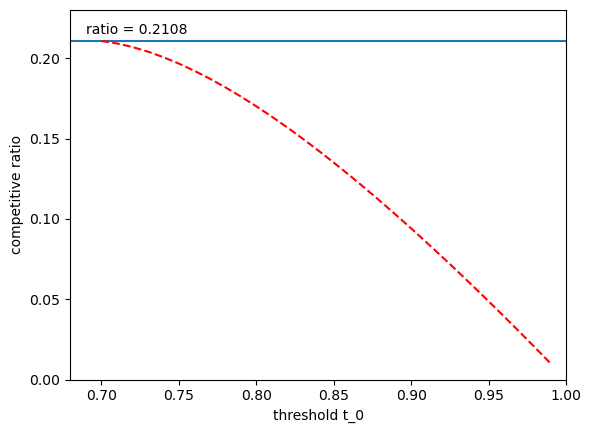

In [41]:
plt.xlabel('threshold t_0')
plt.ylabel('competitive ratio')
plt.axhline(0.2108)
plt.text(0.69,0.215,'ratio = 0.2108')
plt.plot(thresholds,ratios,'r--')
plt.axis([0.68, 1, 0, 0.23])
plt.show()

In [9]:
# This part is to calculate the competitive ratio for different ranks

In [24]:
def sum_over_k(k,t,t_0):
    sum_to_k = 0
    for i in range(k):
        cdf = gamma.cdf(math.log(t/t_0), i+1, loc=0, scale=1/(i+1))
        sum_to_k = sum_to_k + cdf
    return sum_to_k

In [25]:
def ratio_k(k):
    ratio_for_k = 0
    for i in range(10):
        threshold = (i+1)*0.1
        result = integrate.quad(lambda t: 1-sum_over_k(k,t,threshold), threshold, 1)
        if result[0] > ratio_for_k:
            ratio_for_k = result[0]
    return(1/ratio_for_k)

In [26]:
ranks = [1,2,3,4,5,6,7,8,9,10,20,30,40,50]
competitive_ratios = [ratio_k(k) for k in ranks]

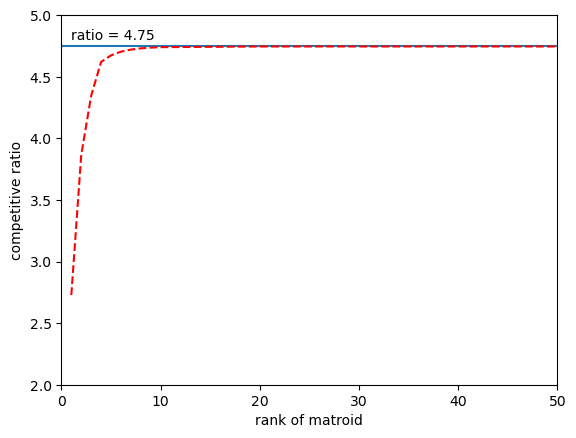

In [28]:
plt.xlabel('rank of matroid')
plt.ylabel('competitive ratio')
plt.axhline(4.75)
plt.text(1,4.8,'ratio = 4.75')
plt.plot(ranks,competitive_ratios,'r--')
plt.axis([0, 50, 2, 5])
plt.show()